# Домашнее задание по pandas
Домашнее задание будет посвящено работе с данными некоторых игр Hearthstone (это такая пошаговая карточная игра)

Для начала скачайте данные https://www.dropbox.com/s/oahfrrqx11fcubv/trainingData_.zip?dl=0

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('trainingData_tabular_chunk1.csv')

1. Сделать таблицу матчапов 9х9 где по обоим осям названия героев (hero_card_id) а в ячейке i, j - процент побед(средний decision) героя i против героя j 
2. Объедините по hero_card_id данную таблицу со средним ходом победы данного героя. при наличии более 5 карт в руке
3. Создайте столбец броня+здоровье. Посчитайте среднее значение decision. Постройте график этой зависимости (через df.plot())


При возникновении не раскрытых вопросов пользуйтесь документацией или данным введением https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

Присылайте ответы в форму - https://forms.gle/BwWyPuSLV83PovZD7

In [5]:
print(sorted(pd.unique(df.loc[: ,"opponent.hero_card_id"])))
print(sorted(pd.unique(df.loc[: ,"player.hero_card_id"])))

[25, 326, 390, 494, 612, 754, 798, 981, 1235]
[25, 326, 390, 494, 612, 754, 798, 981, 1235]


In [6]:
print(df.columns)
df.sort_values("opponent.hero_card_id", ascending=True).head(15)


Index(['gamestate_id', 'decision', 'turn', 'opponent.armor', 'opponent.attack',
       'opponent.hero_card_id', 'opponent.hp', 'opponent.special_skill_used',
       'opponent.weapon_durability', 'opponent.crystals_all',
       'opponent.crystals_current', 'opponent.deck_count',
       'opponent.fatigue_damage', 'opponent.hand_count',
       'opponent.played_minions_count', 'player.armor', 'player.attack',
       'player.hero_card_id', 'player.hp', 'player.special_skill_used',
       'player.weapon_durability', 'player.crystals_all',
       'player.crystals_current', 'player.deck_count', 'player.fatigue_damage',
       'player.hand_count', 'player.played_minions_count',
       'opponent.played.nOfCards', 'opponent.played.attack',
       'opponent.played.crystals_cost', 'opponent.played.hp_current',
       'opponent.played.hp_max', 'player.played.nOfCards',
       'player.played.attack', 'player.played.crystals_cost',
       'player.played.hp_current', 'player.played.hp_max',
       'pla

,gamestate_id,decision,turn,opponent.armor,opponent.attack,opponent.hero_card_id,opponent.hp,opponent.special_skill_used,opponent.weapon_durability,opponent.crystals_all,...,player.played.hp_current,player.played.hp_max,player.hand.nOfMinions,player.hand.nOfSpells,player.hand.nOfWeapons,player.hand.nOfCards,player.hand.nOfPlayable,player.hand.attack,player.hand.crystals_cost,player.hand.hp
118454,3088948,1,11,0,0,25,11,0,0,10,...,20,26,1,1,1,3,2,10,15,8
448444,1196063,1,2,0,0,25,30,0,0,1,...,0,0,4,1,0,5,2,14,18,13
111009,4828913,1,11,0,0,25,15,0,0,10,...,16,24,5,0,0,5,4,23,23,21
448455,2602728,1,6,0,0,25,28,0,0,5,...,3,3,4,1,1,6,1,19,20,20
110988,3288991,1,10,0,0,25,6,0,0,9,...,15,19,4,1,1,6,0,20,24,21
110987,2827517,0,8,0,0,25,22,0,0,7,...,0,0,1,1,0,2,2,6,10,6
292494,2207190,1,13,0,0,25,7,0,0,10,...,27,32,4,0,0,4,4,16,17,17
292496,4388739,1,3,0,0,25,30,0,0,2,...,2,2,4,0,1,5,3,18,16,16
292497,2947960,1,13,0,0,25,18,0,0,10,...,18,22,4,1,0,5,5,14,19,16
448464,1310933,1,11,0,0,25,25,0,0,10,...,12,15,4,0,0,4,0,19,19,21


Для начала подготовим датасет. Как мы можем заметить, названия колонок нашего датасета хаотичны, часть из них представлена в camelCase, другая часть в snake_case. Приведем колонки к общему виду (snake_case). Оставим "." между класификаторами

In [10]:
df.columns = ['gamestate_id', 'decision', 'turn', 'opponent.armor', 'opponent.attack',
       'opponent.hero_card_id', 'opponent.hp', 'opponent.special_skill_used',
       'opponent.weapon_durability', 'opponent.crystals_all',
       'opponent.crystals_current', 'opponent.deck_count',
       'opponent.fatigue_damage', 'opponent.hand_count',
       'opponent.played_minions_count', 'player.armor', 'player.attack',
       'player.hero_card_id', 'player.hp', 'player.special_skill_used',
       'player.weapon_durability', 'player.crystals_all',
       'player.crystals_current', 'player.deck_count', 'player.fatigue_damage',
       'player.hand_count', 'player.played_minions_count',
       'opponent.played.n_of_cards', 'opponent.played.attack',
       'opponent.played.crystals_cost', 'opponent.played.hp_current',
       'opponent.played.hp_max', 'player.played.n_of_cards',
       'player.played.attack', 'player.played.crystals_cost',
       'player.played.hp_current', 'player.played.hp_max',
       'player.hand.n_of_minions', 'player.hand.n_of_spells',
       'player.hand.n_of_weapons', 'player.hand.n_of_cards',
       'player.hand.n_of_playable', 'player.hand.attack',
       'player.hand.crystals_cost', 'player.hand.hp']

In [12]:
df.dtypes

gamestate_id                     int64
decision                         int64
turn                             int64
opponent.armor                   int64
opponent.attack                  int64
opponent.hero_card_id            int64
opponent.hp                      int64
opponent.special_skill_used      int64
opponent.weapon_durability       int64
opponent.crystals_all            int64
opponent.crystals_current        int64
opponent.deck_count              int64
opponent.fatigue_damage          int64
opponent.hand_count              int64
opponent.played_minions_count    int64
player.armor                     int64
player.attack                    int64
player.hero_card_id              int64
player.hp                        int64
player.special_skill_used        int64
player.weapon_durability         int64
player.crystals_all              int64
player.crystals_current          int64
player.deck_count                int64
player.fatigue_damage            int64
player.hand_count        

Тип данных внутри колонок : integer, что нас устраивает, соответственно манипуляций с ними производить не нужно. Перейдем к интересующим нас срезам

In [74]:
df["player.hero_card_id"].value_counts(normalize=True)

1235    0.127250
25      0.123498
494     0.118742
798     0.117786
754     0.111210
612     0.108280
981     0.106184
390     0.094030
326     0.093020
Name: player.hero_card_id, dtype: float64

Как можем заметить, наиболее популярный герой, нашего игрока, скрываетсяя под индексом 1235, наш игрок сыграл на нем 12,7% всех игр. В целом распределение равномерное, так разница между наиболее и наименее популярным героем около 3.4%. Общее число игр в датасете 500.000. Перейдем к анализу побед

In [250]:
matchup = pd.DataFrame(index=df["player.hero_card_id"].sort_values().unique(), columns=df["player.hero_card_id"].sort_values().unique())

In [251]:
matchup

,25,326,390,494,612,754,798,981,1235
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### *Задание 1*. Сделать таблицу матчапов 9х9 где по обоим осям названия героев (hero_card_id) а в ячейке i, j - процент побед(средний decision) героя i против героя j
здесь обходим по циклу таблицу для присваивания искомых значений

In [362]:
def table_filler(i, k):
    values = []
    for item in i:
        
        filter_bool = (df["player.hero_card_id"] == k) & (df["opponent.hero_card_id"] == item)
        series = df[filter_bool]
        stats = series["decision"] == 1
        
        value = round(stats.value_counts()[True] / stats.value_counts().sum() * 100, 3)
        values.append(value)
    
    return values
    
    
    


In [363]:
for item in matchup.columns:
    result = table_filler(matchup.columns, item)
    matchup[item] = result
    

In [364]:
matchup

,25,326,390,494,612,754,798,981,1235
25,49.553,49.834,50.074,49.749,49.931,49.582,50.013,49.538,49.467
326,50.316,50.351,51.304,50.292,51.066,49.750,50.235,50.934,50.060
390,51.318,48.788,50.558,49.215,50.726,50.289,50.245,50.264,49.001
494,51.777,50.061,49.834,48.897,50.160,50.552,51.360,50.893,53.011
612,50.582,50.564,48.978,50.937,49.853,49.222,50.296,50.061,48.828
754,51.840,50.880,50.427,51.177,51.005,50.061,50.345,50.451,50.985
798,49.464,49.640,50.833,50.270,50.013,49.366,50.996,53.737,52.380
981,49.992,50.269,50.571,50.899,51.124,50.035,50.033,51.260,49.630
1235,52.693,50.625,49.680,49.971,51.667,49.232,51.298,53.200,50.596


In [365]:
matchup.describe()

,25,326,390,494,612,754,798,981,1235
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,50.837222,50.112444,50.251000,50.156333,50.616111,49.787667,50.535667,51.148667,50.439778
std,1.126387,0.631933,0.691642,0.783133,0.647256,0.477191,0.532344,1.417653,1.462510
min,49.464000,48.788000,48.978000,48.897000,49.853000,49.222000,50.013000,49.538000,48.828000
25%,49.992000,49.834000,49.834000,49.749000,50.013000,49.366000,50.235000,50.264000,49.467000
50%,50.582000,50.269000,50.427000,50.270000,50.726000,49.750000,50.296000,50.893000,50.060000
75%,51.777000,50.564000,50.571000,50.899000,51.066000,50.061000,50.996000,51.260000,50.985000
max,52.693000,50.880000,51.304000,51.177000,51.667000,50.552000,51.360000,53.737000,53.011000


Исходя из данных видно, что винрейт исследуемого игрока на всех героях выше 50%, кроме персонажа под индексом 754. Там среднее значение 49,78%. Также, можем определить, что максимальный винрейт соответстует персонажу с индексом 981, если сверить данные с таблицой мы получаем, что это значение сосответствует оппоненту с индексом персонажа 798. Наименее успешное противостояние у персонажа с индексом 326 против 390, значение 48,78%, что говорит о том, что количество поражений в таком противостоянии превосходит победы.

In [326]:
filter_test = (df["player.hero_card_id"] == 612) & (df["opponent.hero_card_id"] == 612)

In [340]:
df

,gamestate_id,decision,turn,opponent.armor,opponent.attack,opponent.hero_card_id,opponent.hp,opponent.special_skill_used,opponent.weapon_durability,opponent.crystals_all,...,player.played.hp_current,player.played.hp_max,player.hand.n_of_minions,player.hand.n_of_spells,player.hand.n_of_weapons,player.hand.n_of_cards,player.hand.n_of_playable,player.hand.attack,player.hand.crystals_cost,player.hand.hp
0,4687346,1,14,0,0,798,5,0,0,10,...,20,23,4,0,1,5,0,20,22,17
1,3270826,1,7,0,0,754,22,0,0,6,...,16,17,3,2,2,7,0,17,26,20
2,3189487,1,5,3,0,612,29,0,0,4,...,0,0,5,0,0,5,2,26,28,27
3,4098946,1,8,0,0,390,26,0,0,7,...,2,2,7,1,1,9,9,36,44,36
4,2661127,0,13,0,0,25,30,0,0,10,...,7,7,4,0,0,4,4,13,13,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,4649714,1,6,0,0,754,27,0,1,5,...,3,5,2,3,0,5,2,10,28,12
499996,1089131,0,8,2,5,1235,27,0,1,7,...,0,0,4,2,0,6,1,18,26,23
499997,3457659,1,23,0,0,798,1,0,0,10,...,14,18,3,1,0,4,3,16,18,18
499998,3503888,0,6,0,0,25,24,0,0,5,...,7,7,3,1,0,4,0,16,20,16


###### *Задание 2*. Объедините по hero_card_id данную таблицу со средним ходом победы данного героя. при наличии более 5 карт в руке

In [357]:
df.columns

Index(['gamestate_id', 'decision', 'turn', 'opponent.armor', 'opponent.attack',
       'opponent.hero_card_id', 'opponent.hp', 'opponent.special_skill_used',
       'opponent.weapon_durability', 'opponent.crystals_all',
       'opponent.crystals_current', 'opponent.deck_count',
       'opponent.fatigue_damage', 'opponent.hand_count',
       'opponent.played_minions_count', 'player.armor', 'player.attack',
       'player.hero_card_id', 'player.hp', 'player.special_skill_used',
       'player.weapon_durability', 'player.crystals_all',
       'player.crystals_current', 'player.deck_count', 'player.fatigue_damage',
       'player.hand_count', 'player.played_minions_count',
       'opponent.played.n_of_cards', 'opponent.played.attack',
       'opponent.played.crystals_cost', 'opponent.played.hp_current',
       'opponent.played.hp_max', 'player.played.n_of_cards',
       'player.played.attack', 'player.played.crystals_cost',
       'player.played.hp_current', 'player.played.hp_max',
       

In [417]:
df["turn"].describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .995])

count    500000.000000
mean          8.935080
std           4.588388
min           1.000000
10%           3.000000
20%           5.000000
30%           6.000000
40%           7.000000
50%           9.000000
60%          10.000000
70%          11.000000
80%          13.000000
99.5%        23.000000
max          30.000000
Name: turn, dtype: float64

Исходя из колонки turn следует, что среднее число ходов 8,94 до конца игры. Несмотря на то, что я считаю значения в 30 ходов и 29 ходов некорректным в рамках анализа текущей ситуация, суммарная сумма этих игр - 10, что не будут влиять на общий статистический анализ.

In [441]:
bool = (df["turn"].between(29,30))

In [442]:
df["opponent.fatigue_damage"][bool]

39198     4
85389     5
131811    5
277878    4
283667    4
332976    5
368157    5
408280    5
428151    5
430551    4
454068    4
475821    4
489136    4
Name: opponent.fatigue_damage, dtype: int64

Моё предположение подтверждается, при анализе "урона от усталости" для игр с числом ходов >= 29. В играх он равен как для персоны, так и для оппонента, что свидетельствует о некачественности этих игр. Высока вероятность, что проблема была связана с технической стороной, т.е. "дисконнект" от сервера у обоих оппонентом. Однако можно допускать 5%, что примерно 1-2 игры из выборки, вероятность правдивости таких игр, что в целом не критично в контексте анализа игр, общим количеством 500.000

In [443]:
df[bool].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 39198 to 489136
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   gamestate_id                   13 non-null     int64
 1   decision                       13 non-null     int64
 2   turn                           13 non-null     int64
 3   opponent.armor                 13 non-null     int64
 4   opponent.attack                13 non-null     int64
 5   opponent.hero_card_id          13 non-null     int64
 6   opponent.hp                    13 non-null     int64
 7   opponent.special_skill_used    13 non-null     int64
 8   opponent.weapon_durability     13 non-null     int64
 9   opponent.crystals_all          13 non-null     int64
 10  opponent.crystals_current      13 non-null     int64
 11  opponent.deck_count            13 non-null     int64
 12  opponent.fatigue_damage        13 non-null     int64
 13  opponent.hand_

In [447]:
df["player.hand.n_of_cards"].describe()

count    500000.000000
mean          4.608842
std           1.732399
min           0.000000
25%           4.000000
50%           5.000000
75%           6.000000
max          10.000000
Name: player.hand.n_of_cards, dtype: float64

Данные соответствуют реальным ожиданиям, можем приступать к анализу

In [492]:
turn = pd.DataFrame(index=df["player.hero_card_id"].sort_values().unique(), columns=["mean_turn"])

In [494]:
data = []
for i in matchup.columns:
    
    bool_data = (df["player.hero_card_id"] == i) & (df["decision"] == 1) & (df["player.hand.n_of_cards"] > 5)
    turn_mean = df[bool_data]
    statS = turn_mean["turn"].mean()
    data.append(statS)

In [495]:
turn["mean_turn"] = data

In [496]:
turn

,mean_turn
25,7.458047
326,6.340084
390,7.510715
494,8.089359
612,8.101036
754,8.210944
798,7.441293
981,7.570990
1235,7.608602


Исходя из статистики можно увидеть, что минимальным средним количеством ходов для победы обладает персонаж с индексом 326, с максимальным средним - 754. При этом количество кард на руке у игрока > 5

###### *Задание 3*. Создайте столбец броня+здоровье. Посчитайте среднее значение decision. Постройте график этой зависимости (через df.plot())

In [616]:
armor_health = pd.DataFrame(columns=["armor_health", "decision"])

In [617]:
armor_health

,armor_health,decision


In [504]:
df.columns

Index(['gamestate_id', 'decision', 'turn', 'opponent.armor', 'opponent.attack',
       'opponent.hero_card_id', 'opponent.hp', 'opponent.special_skill_used',
       'opponent.weapon_durability', 'opponent.crystals_all',
       'opponent.crystals_current', 'opponent.deck_count',
       'opponent.fatigue_damage', 'opponent.hand_count',
       'opponent.played_minions_count', 'player.armor', 'player.attack',
       'player.hero_card_id', 'player.hp', 'player.special_skill_used',
       'player.weapon_durability', 'player.crystals_all',
       'player.crystals_current', 'player.deck_count', 'player.fatigue_damage',
       'player.hand_count', 'player.played_minions_count',
       'opponent.played.n_of_cards', 'opponent.played.attack',
       'opponent.played.crystals_cost', 'opponent.played.hp_current',
       'opponent.played.hp_max', 'player.played.n_of_cards',
       'player.played.attack', 'player.played.crystals_cost',
       'player.played.hp_current', 'player.played.hp_max',
       

In [505]:
df["player.armor"].describe()

count    500000.000000
mean          0.343374
std           1.220621
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          19.000000
Name: player.armor, dtype: float64

In [508]:
df["player.hp"].describe()

count    500000.000000
mean         21.755078
std           8.232413
min           1.000000
25%          16.000000
50%          24.000000
75%          29.000000
max          30.000000
Name: player.hp, dtype: float64

Значения в пределах нормы

In [618]:
armor_health["armor_health"] = (df["player.armor"] + df["player.hp"]).unique()

In [512]:
armor_health["decision"] = df["decision"]

In [619]:
armor_health["armor_health"].describe()

count    48.00
mean     24.50
std      14.00
min       1.00
25%      12.75
50%      24.50
75%      36.25
max      48.00
Name: armor_health, dtype: float64

In [615]:
armor_health["armor_health"].unique()

array([nan], dtype=object)

In [622]:
dec = []
def get_decision():
    for i in armor_health["armor_health"].unique():
        boleand = (df["armor_health"] == i)
        dec.append(df[boleand]["decision"].mean())

In [623]:
get_decision()

In [624]:
armor_health["decision"] = dec

In [625]:
armor_health

,armor_health,decision
0,17,0.505624
1,29,0.585132
2,31,0.557228
3,26,0.565508
4,8,0.335337
5,30,0.537295
6,28,0.573439
7,25,0.563377
8,27,0.574427
9,9,0.356065


ploting chart

In [583]:
armor_health = armor_health.drop([46,47],axis=0)

In [628]:
armor_health["decision"] = armor_health["decision"] * 100

In [597]:
import matplotlib.pyplot as plt

<AxesSubplot:>

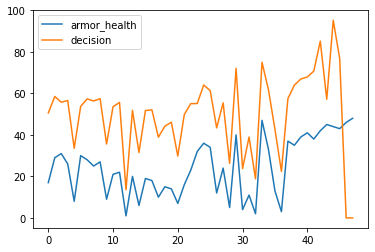

In [631]:
armor_health.plot()

Из графика следует существование прямой зависимости между количеством здоровья и брони и процентом побед соответствующим этому количеству